# Funciones de distribución de probabilidades

## Distribución uniforme

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a, b, n)

(array([ 99564., 100477.,  99962., 100997., 100121.,  99981.,  99686.,
        100082.,  99290.,  99840.]),
 array([ 1.00005365, 10.90003676, 20.80001988, 30.70000299, 40.5999861 ,
        50.49996921, 60.39995232, 70.29993543, 80.19991854, 90.09990165,
        99.99988476]),
 <a list of 10 Patch objects>)

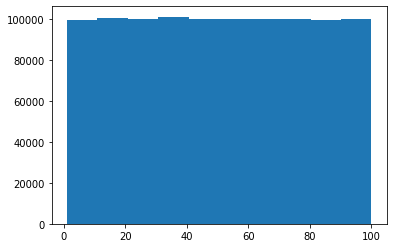

In [14]:
%matplotlib inline
plt.hist(data)

## Distribución normal

In [18]:
data = np.random.randn(1000000)

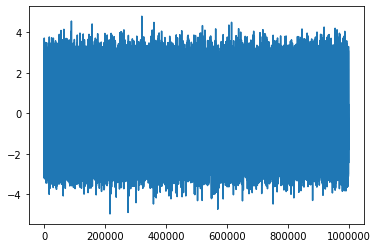

In [20]:
x = range(1,1000001)
plt.plot(x, data)

(array([3.20000e+01, 1.25300e+03, 1.94710e+04, 1.23579e+05, 3.22472e+05,
        3.46639e+05, 1.55430e+05, 2.88870e+04, 2.16100e+03, 7.60000e+01]),
 array([-4.96378987, -3.98802972, -3.01226956, -2.0365094 , -1.06074924,
        -0.08498908,  0.89077108,  1.86653124,  2.8422914 ,  3.81805156,
         4.79381172]),
 <a list of 10 Patch objects>)

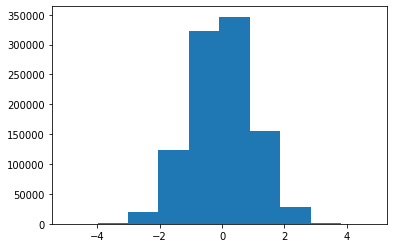

In [21]:
plt.hist(data)

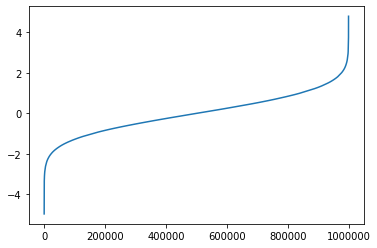

In [22]:
plt.plot(x, sorted(data)) #comprobamos que es una función gaussiana

(array([3.100e+01, 1.690e+02, 8.610e+02, 2.097e+03, 3.034e+03, 2.382e+03,
        1.092e+03, 3.000e+02, 3.100e+01, 3.000e+00]),
 array([-3.44824236, -1.50643031,  0.43538174,  2.37719379,  4.31900584,
         6.26081789,  8.20262994, 10.14444199, 12.08625405, 14.0280661 ,
        15.96987815]),
 <a list of 10 Patch objects>)

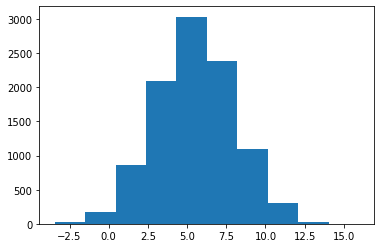

In [24]:
mu = 5.5
sd = 2.5
Z_10000 = np.random.randn(10000)
data2 = mu + sd*Z_10000 # z = (X - mu)/sd -> N(0,1), X = mu + sd * Z
plt.hist(data2)

In [25]:
data3 = np.random.randn(2,4)
data3

array([[ 0.44603533, -0.43100388, -0.02979267,  0.04736505],
       [ 0.58226591,  0.31203065,  1.12631116, -0.69241986]])

## La simulación de Monte Carlo

Se utiliza para el cálculo del valor de Pi

1. Generamos 2 números aleatorios uniformes x e y entre 0 y 1 en total 1000 veces.
2. Calcularemos x*x + y*y
 - Si el valor es inferior a 1 --> estamos dentro del círculo
 - Si el valor es superior a 1 --> estamos fuera del círculo
3. Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
4. Usamos dicha probabilidad para aproximar el valor de π.
5. Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de π.
6. Calculamos el promedio de los 1000 experimentos anteriores para dar un valor final de π.


In [32]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j]*x[j] + y[j]*y[j])
            if z <= 1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    fig = plt.plot(pi_value_list)
    return(pi, fig)


(3.1418560000000015, [<matplotlib.lines.Line2D at 0x12213f990>])

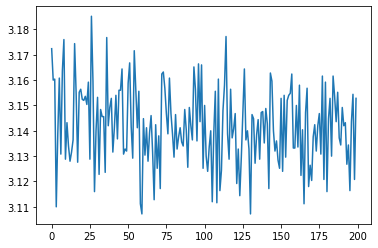

In [33]:
pi_montecarlo(10000, 200)

## Dummy Datasets

In [37]:
n = 1000000
data = pd.DataFrame(
    {
        'A': np.random.randn(n),
        'B': 1.5 + 2.5 * np.random.randn(n),
        'C': np.random.uniform(5,32,n)
    }
)

In [39]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,-0.000089,1.500718,18.522161
std,0.999593,2.501249,7.795435
min,-4.957147,-11.667401,5.000021
25%,-0.674196,-0.187800,11.762515
50%,-0.000030,1.500295,18.526116
75%,0.673993,3.191111,25.276898
max,5.194265,14.183057,31.999943


(array([2.90000e+01, 1.67300e+03, 2.61200e+04, 1.56751e+05, 3.62509e+05,
        3.24460e+05, 1.12663e+05, 1.50220e+04, 7.61000e+02, 1.20000e+01]),
 array([-4.95714734, -3.94200616, -2.92686497, -1.91172378, -0.89658259,
         0.1185586 ,  1.13369978,  2.14884097,  3.16398216,  4.17912335,
         5.19426454]),
 <a list of 10 Patch objects>)

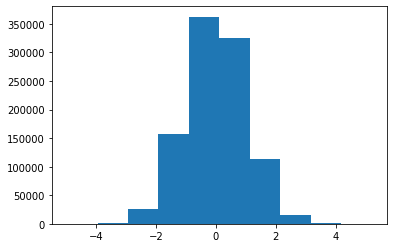

In [40]:
plt.hist(data["A"])

(array([1.60000e+01, 6.81000e+02, 1.45850e+04, 1.13834e+05, 3.32203e+05,
        3.63770e+05, 1.50732e+05, 2.28760e+04, 1.27800e+03, 2.50000e+01]),
 array([-11.66740079,  -9.08235502,  -6.49730924,  -3.91226347,
         -1.3272177 ,   1.25782808,   3.84287385,   6.42791963,
          9.0129654 ,  11.59801118,  14.18305695]),
 <a list of 10 Patch objects>)

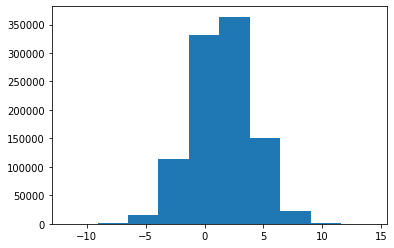

In [41]:
plt.hist(data["B"])

(array([ 99449., 100115.,  99646.,  99443., 100363.,  99810., 100174.,
        100043., 100456., 100501.]),
 array([ 5.00002138,  7.70001358, 10.40000578, 13.09999798, 15.79999018,
        18.49998238, 21.19997457, 23.89996677, 26.59995897, 29.29995117,
        31.99994337]),
 <a list of 10 Patch objects>)

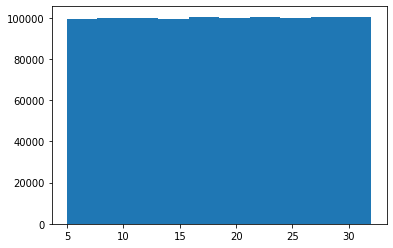

In [42]:
plt.hist(data["C"])

In [43]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [44]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [45]:
column_names = data.columns.values.tolist()

In [47]:
a = len(column_names)
a

21

In [50]:
new_data = pd.DataFrame(
    {
        'Column Name': column_names,
        'A': np.random.randn(a),
        'B': np.random.uniform(0,1,a)
    }, index = range(42, 42 +a)
)

In [51]:
new_data

,Column Name,A,B
42,State,0.367655,0.152154
43,Account Length,0.458395,0.203311
44,Area Code,1.082153,0.648851
45,Phone,-0.053873,0.865539
46,Int'l Plan,0.650416,0.696347
47,VMail Plan,1.145290,0.315622
48,VMail Message,0.591846,0.334511
49,Day Mins,-1.560535,0.770741
50,Day Calls,1.630606,0.946705
51,Day Charge,-1.563308,0.632193
